#Clasificación Cuadrático

Se tomará el modelo clásico de clasificación cuadrático aplicado sobre la base de datos Iris


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy.matlib
#import networkx as nx
#%matplotlib notebook
%matplotlib inline
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
# if using a Jupyter notebook, include:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Carga de datos

In [ ]:
#data = sio.loadmat('/BaseDAMA_SebasX.xlsx')
data = pd.read_excel('/content/EjemIris.xlsx',sheet_name='Hoja1')

#data = pd.read_excel('/content/BaseDAMA_SebasX.xlsx',sheet_name='Base de datos1')
p = int(input('Ingrese número variables a considerar'))
Idx = []
for v in range(p):
    varia=int(input("Ingrese el indice de la variable"+str(v)))
    Idx.append(varia)

print((Idx))
#x = data.iloc[:,0:-1]
x = data.iloc[:,Idx]
y = data.iloc[:, -1]

#x = np.array(x)
y = np.array(y)
y=y.reshape(-1, 1)
#print(y.T) # First Method
#print(y.transpose())

#for label in data[0::,-1]:  y.append(int(label))
print('Numero de clases - Datos Clasificación Iris:', np.unique(y))
print(x.shape,y.shape)

Ingrese número variables a considerar2
Ingrese el indice de la variable00
Ingrese el indice de la variable13
[0, 3]
Numero de clases - Datos Clasificación Iris: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
(150, 2) (150, 1)


Se cargan los datos desde un archivo *.xlsx*. Este archivo esta alojado en el drive personal.

In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

#catvariab = OneHotEncoder()
catvariab = OrdinalEncoder()
#y = np.array(y)
#y = y.reshape(1, -1)
#x = catvariab.fit_transform(x)
y = catvariab.fit_transform(y)
print(y.T)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
  2. 2. 2. 2. 2. 2.]]


\\Para este base de datos Iris contiene 3 clase:.
* 1 'Iris-setosa'
* 2 'Iris-versicolor'
* 3 'Iris-virginica'




In [ ]:
print('Los codigos de la variable y:', np.unique(y))
print(x.shape)

Los codigos de la variable y: [0. 1. 2.]
(150, 2)


Modelo cuadrático

In [ ]:
from scipy.sparse.data import matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
eti = np.unique(y_train)
ProApriri = []
Covar = []
for v in range(len(eti)):
    varia=float(input("Ingrese la probabilidad apriori de la clase:"+str(v)+": "))
    ProApriri.append(varia)
    print("Ingrese la Matriz de covarianzas:"+str(v)+": ")
    covar = []
    for i in range(len(Idx)):
      covar.append([])
      for j in range(len(Idx)):
        valor = float(input('Ingrese el elemento C(i{},j{}):'.format(i+1,j+1)))
        covar[i].append(valor)
    Covar.append(covar)

print(Covar)


Ingrese la probabilidad apriori de la clase:0: 0.33
Ingrese la Matriz de covarianzas:0: 
Ingrese el elemento C(i1,j1):1
Ingrese el elemento C(i1,j2):1
Ingrese el elemento C(i2,j1):0
Ingrese el elemento C(i2,j2):1
Ingrese la probabilidad apriori de la clase:1: 0.33
Ingrese la Matriz de covarianzas:1: 
Ingrese el elemento C(i1,j1):1
Ingrese el elemento C(i1,j2):0
Ingrese el elemento C(i2,j1):0
Ingrese el elemento C(i2,j2):1
Ingrese la probabilidad apriori de la clase:2: 0.33
Ingrese la Matriz de covarianzas:2: 
Ingrese el elemento C(i1,j1):1
Ingrese el elemento C(i1,j2):0
Ingrese el elemento C(i2,j1):0
Ingrese el elemento C(i2,j2):3
[[[1.0, 1.0], [0.0, 1.0]], [[1.0, 0.0], [0.0, 1.0]], [[1.0, 0.0], [0.0, 3.0]]]


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


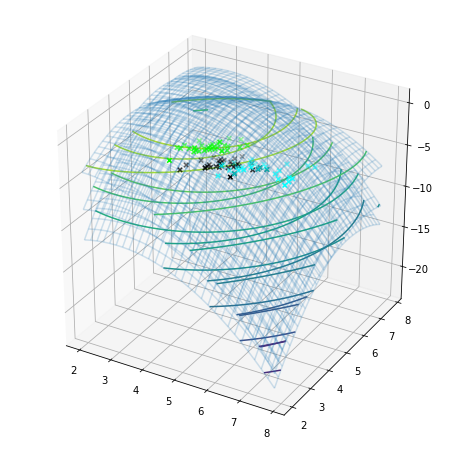

In [ ]:
Prob_train = []
Prob_test = []
X0 = []
Med = []
#Covar = []
for i in range(len(eti)):
  temp0 = y_train==i
  temp = X_train[temp0]
  med = temp.mean(axis = 0)
  #covar = temp.cov()
  Med.append(med)
  #Covar.append(covar)
  #gm = multivariate_normal.pdf(mean=med, cov=covar)
  if len(Idx) == 1: # P(x|w) funcion de verosimilitud
    fig = plt.figure(0, figsize = (8,8) )
    x0 = np.linspace(X_train.min(), X_train.max(), 1000, endpoint=False)
    print(x0.shape)
    #y0 = multivariate_normal.pdf(x0, mean=med, cov=Covar[i]);
    y0 = -np.multiply( 0.5*(x0-np.matlib.repmat(Med[i],x0.shape[0],x0.shape[1]))*np.linalg.inv(Covar[i]),(x0-np.matlib.repmat(Med[i],x0.shape[0],x0.shape[1])))+np.log(ProApriri[i]/np.sqrt(np.linalg.det(Covar[i])))
    plt.plot(x0, y0)
    X0.append(temp)
    y0 = -np.multiply( 0.5*(X_train-np.matlib.repmat(Med[i],X_train.shape[0],X_train.shape[1]))*np.linalg.inv(Covar[i]),(X_train-np.matlib.repmat(Med[i],X_train.shape[0],X_train.shape[1])))+np.log(ProApriri[i]/np.sqrt(np.linalg.det(Covar[i])))
    Prob_train.append(y0)
    z0 = -np.multiply( 0.5*(X_test-np.matlib.repmat(Med[i],X_test.shape[0],X_test.shape[1]))*np.linalg.inv(Covar[i]),(X_test-np.matlib.repmat(Med[i],X_test.shape[0],X_test.shape[1])))+np.log(ProApriri[i]/np.sqrt(np.linalg.det(Covar[i])))
    Prob_test.append(z0)

    #plt.scatter(temp, 0*temp, c = np.random.rand(1, 3) )
    plt.scatter(temp, 0*temp,)
  elif len(Idx) == 2:
    rv = []
    x0, y0 = np.mgrid[min(X_train.min()):max(X_train.max()):.1, min(X_train.min()):max(X_train.max()):.1]
    s = np.ravel(x0, order='F')
    t = np.ravel(y0, order='F')
    s=s.T
    t=t.T
    for k in range(len(s)):
      rv.append(np.dot(-0.5*np.dot(([s[k],t[k]]-Med[i]),np.linalg.inv(Covar[i])),([s[k],t[k]]-Med[i]).T) + np.log(ProApriri[i]/np.sqrt(np.linalg.det(Covar[i]))))
    rv = np.reshape(rv,x0.shape)
    name = temp.columns
    valor = []
    for k in range(X_train.shape[0]):
      valor.append(np.dot(-0.5*np.dot((X_train.iloc[k]-Med[i]),np.linalg.inv(Covar[i])),(X_train.iloc[k]-Med[i]).T) + np.log(ProApriri[i]/np.sqrt(np.linalg.det(Covar[i]))))
    Prob_train.append(valor)
    for k in range(X_test.shape[0]):
      valor.append(np.dot(-0.5*np.dot((X_test.iloc[k]-Med[i]),np.linalg.inv(Covar[i])),(X_test.iloc[k]-Med[i]).T) + np.log(ProApriri[i]/np.sqrt(np.linalg.det(Covar[i]))))
    Prob_test.append(valor)

    #rv = multivariate_normal(mean = med, cov = Covar[i])
    #plt.contourf(x0, y0, rv)
    #plt.plot_surface(x0, y0, rv)
    #ax = plt.axes(projection='3d')
    #ax.contour3D(x0, y0, rv.pdf(pos), 50, cmap='hot')
    #plt.contourf(x0, y0, rv.pdf(pos))
    #plt.show()

    fig = plt.figure(0, figsize = (8,8) )
    ax = fig.gca(projection = '3d')
    ax.plot_wireframe(x0 ,y0 ,rv , alpha = 0.2)
    #ax.plot_surface(x0 ,y0 ,rv.pdf(pos), cmap = 'Spectral', alpha = 0.4 )
    #ax.plot_surface(x0 ,y0 ,rv.pdf(pos), cmap = 'coolwarm', alpha = 0.3 )
    ax.contour(x0, y0, rv)
    ax.scatter(temp[temp.columns[0]],temp[temp.columns[1]], np.zeros(len(temp)),c = np.random.randint(2, size =(1,3)), marker = 'x', s = 20)


In [ ]:
Prons_train = []
Prons_test = []
A = np.transpose(Prob_train)
for i in range(X_train.shape[0]):
  valor = (np.where(A[i]==max(A[i])))
  Prons_train.append(valor[0][0])
B = np.transpose(Prob_test)
for i in range(X_test.shape[0]):
  valor = (np.where(A[i]==max(A[i])))
  Prons_test.append(valor[0][0])


In [ ]:
print(Prons_train)
print(y_train.T[0])

[0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0]
[0. 0. 2. 2. 0. 2. 2. 0. 2. 1. 1. 1. 0. 1. 1. 2. 0. 1. 1. 0. 2. 2. 1. 1.
 1. 2. 1. 2. 2. 2. 1. 0. 2. 2. 2. 2. 1. 2. 2. 0. 2. 0. 2. 0. 0. 1. 0. 0.
 2. 1. 0. 1. 1. 0. 0. 0. 1. 2. 0. 1. 0. 1. 2. 0. 0. 1. 2. 1. 1. 1. 2. 1.
 1. 2. 2. 1. 0. 0. 2. 1. 2. 2. 0. 1. 2. 2. 0. 0. 2. 0. 2. 1. 1. 1. 0. 2.
 1. 0. 0. 1. 0. 1. 0. 0. 0.]


In [ ]:
print(Prons_test)
print(y_test.T[0])

[0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0]
[2. 0. 0. 2. 1. 1. 2. 1. 2. 0. 0. 2. 0. 1. 0. 1. 2. 1. 1. 2. 2. 0. 1. 2.
 1. 1. 1. 2. 0. 2. 0. 0. 1. 1. 2. 2. 0. 0. 0. 1. 2. 2. 1. 0. 0.]
